In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import tensorflow as tf
from tensorflow import keras
sns.set_style("darkgrid")

In [2]:
# Path for csv files
files_path ='../notebooks/data_collection/'


# Num of trips
df = pd.read_csv(files_path + 'matrix.csv', index_col='StartDate')
df.index = pd.to_datetime(df.index)

In [3]:
df=df[['373']]

In [4]:
df

,373
StartDate,
2022-01-01 00:00:00,4
2022-01-01 01:00:00,2
2022-01-01 02:00:00,-1
2022-01-01 03:00:00,-3
2022-01-01 04:00:00,-2
...,...
2022-12-30 20:00:00,-1
2022-12-30 21:00:00,0
2022-12-30 22:00:00,-6


In [5]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-30 15:00:00', '2022-12-30 16:00:00',
               '2022-12-30 17:00:00', '2022-12-30 18:00:00',
               '2022-12-30 19:00:00', '2022-12-30 20:00:00',
               '2022-12-30 21:00:00', '2022-12-30 22:00:00',
               '2022-12-30 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', name='StartDate', length=8684, freq=None)

In [6]:
files_path2 ='../../raw_data/data_1year/'

# Load features
features_preproc = pd.read_csv(files_path2 + 'final_features_preproc_12m.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

# Change 2s
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(lambda x: 1 if x>=1 else 0)

# Change names
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

#Drop Columns
features_preproc.drop(columns=['minute','second','London_zone_London_all'], inplace=True)

In [7]:
features_preproc

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,0.729469,0.061224,0.0,2.0,0.383333,1.136490,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 20:00:00,0.685990,0.122449,0.0,2.0,0.246667,1.119777,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 21:00:00,0.676329,0.142857,0.0,2.0,0.190000,1.275766,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [8]:
features_preproc.index = pd.to_datetime(features_preproc.index)

In [9]:
df = df.join(features_preproc)

In [10]:
df=df.dropna()

In [11]:
df=df.rename(columns={'373':'nooftrips'})

In [12]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [13]:
df = df[['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction','weekday']]

In [14]:
df['hour'] = df.index.hour
df['weekday'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month

In [15]:
df.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,hour,day,month
StartDate,,,,,,,,,,,
2022-01-02 00:00:00,-1,0.429952,0.010204,0.0,1.0,0.108333,0.523677,6,0,2,1
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.0,0.330000,0.662953,6,1,2,1
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.0,0.310000,0.668524,6,2,2,1
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,3,2,1
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,4,2,1


<Axes: xlabel='StartDate', ylabel='nooftrips'>

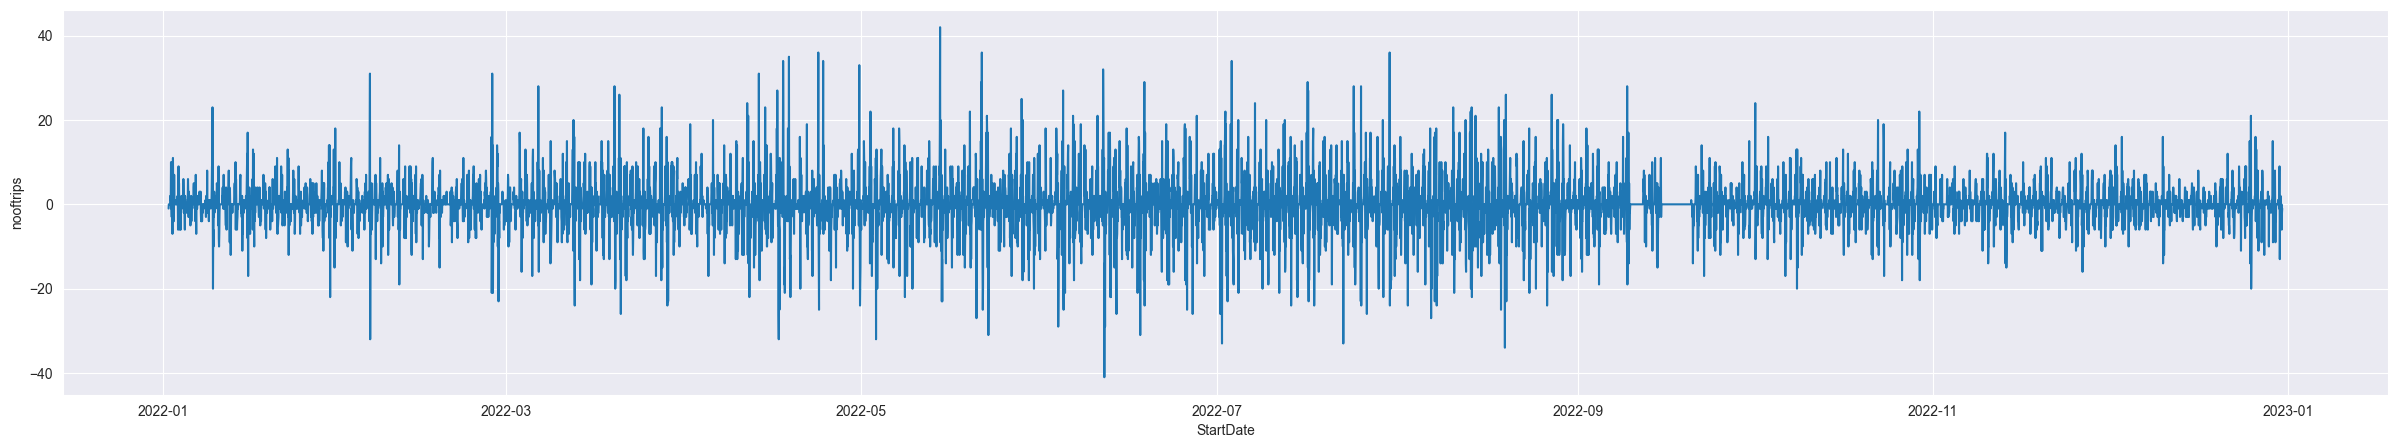

In [16]:
plt.figure(figsize=(30, 5))
sns.lineplot(x=df.index, y='nooftrips',data=df)

<Axes: xlabel='StartDate', ylabel='nooftrips'>

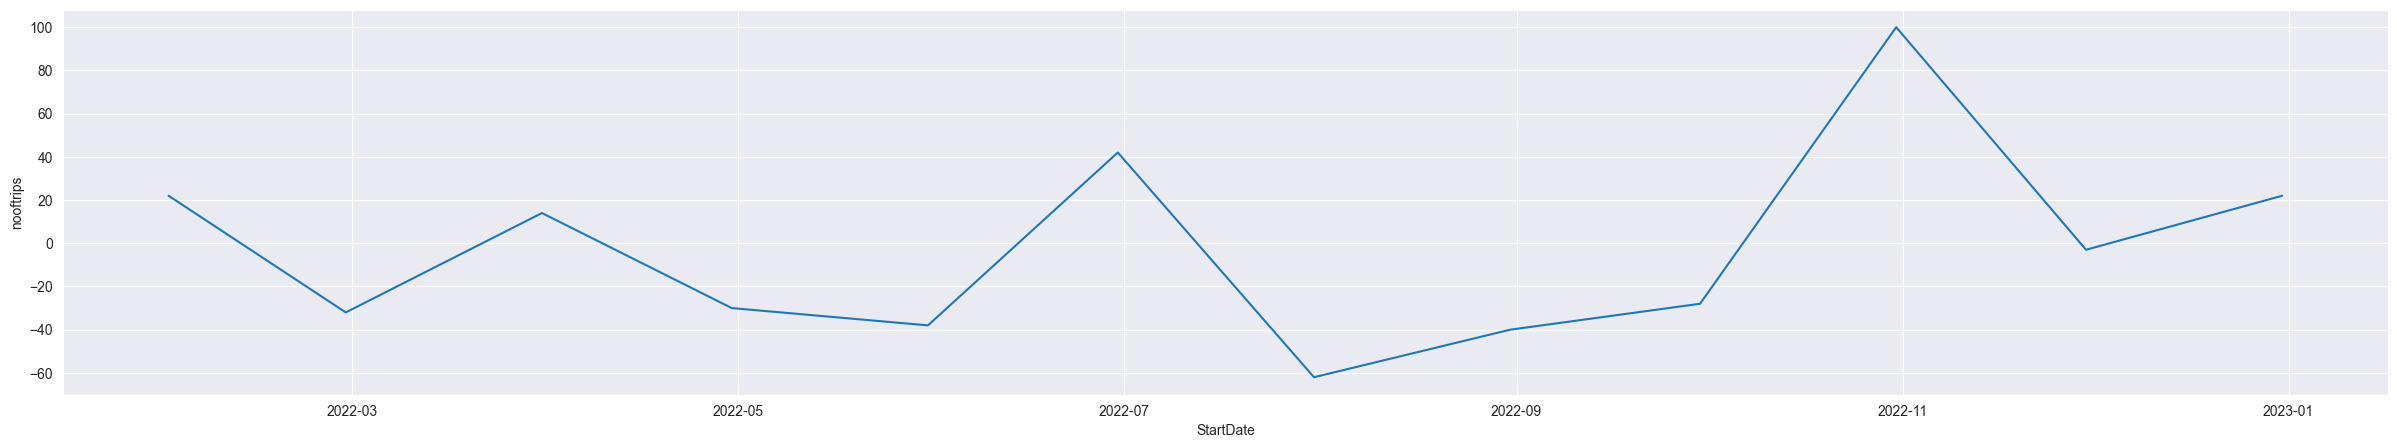

In [17]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(30,5))
sns.lineplot(x=df_by_month.index, y='nooftrips',data=df_by_month)

<Axes: xlabel='hour', ylabel='nooftrips'>

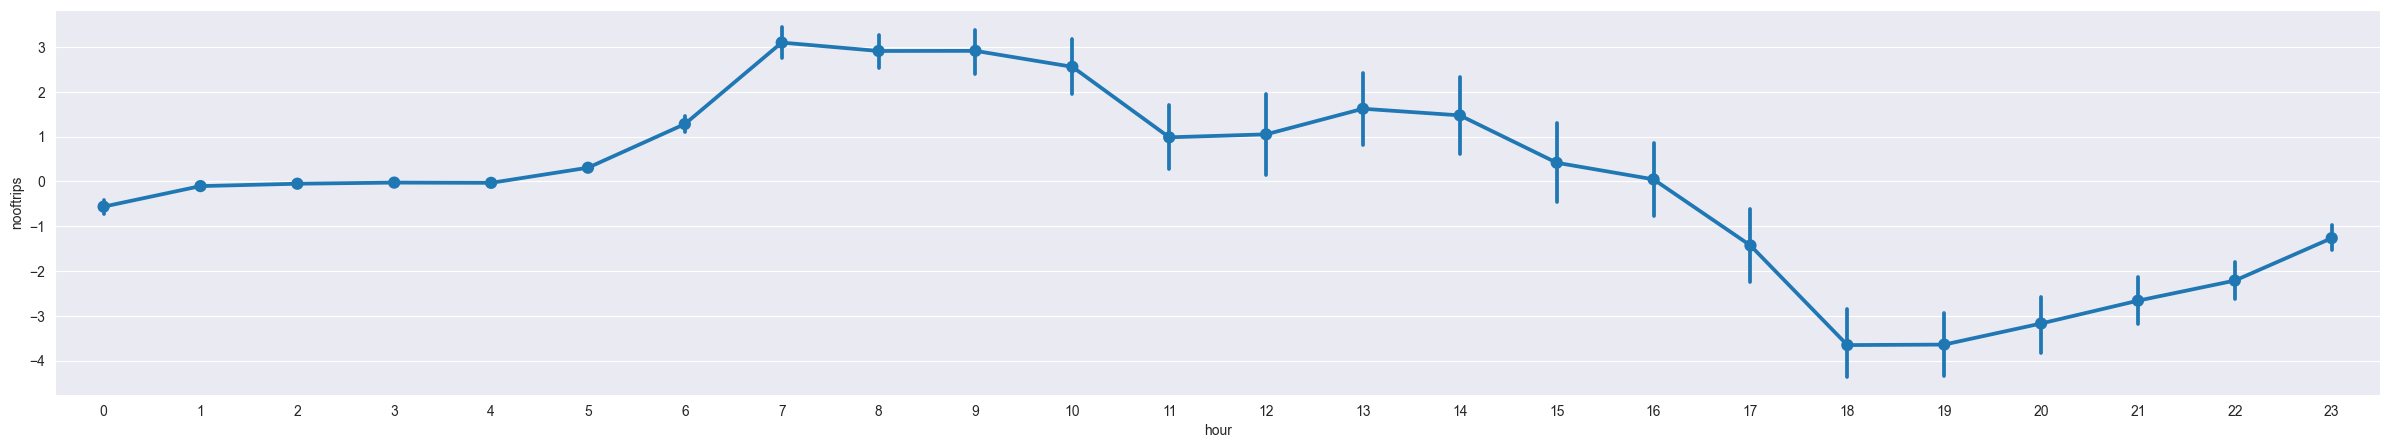

In [18]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='hour', y='nooftrips',data=df)

<Axes: xlabel='weekday', ylabel='nooftrips'>

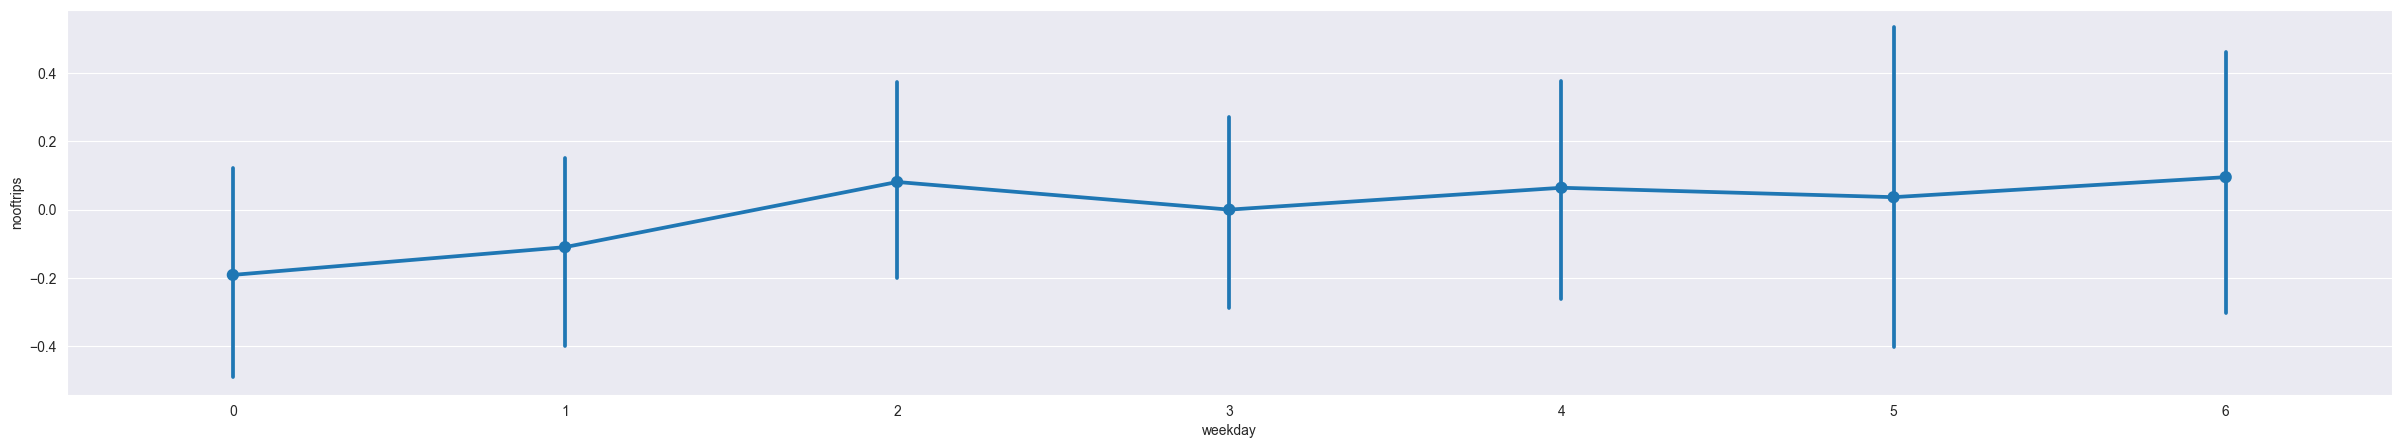

In [19]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='weekday', y='nooftrips',data=df)

In [22]:
train

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,hour,day,month
StartDate,,,,,,,,,,,
2022-01-02 00:00:00,-1,0.429952,0.010204,0.0,1.00,0.108333,0.523677,6,0,2,1
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.00,0.330000,0.662953,6,1,2,1
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.00,0.310000,0.668524,6,2,2,1
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,6,3,2,1
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,6,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 18:00:00,-5,0.374396,0.091837,0.0,0.35,0.431667,0.657382,3,18,24,11
2022-11-24 19:00:00,0,0.355072,0.010204,0.0,0.17,0.346667,0.651811,3,19,24,11
2022-11-24 20:00:00,1,0.355072,0.000000,0.0,0.14,0.303333,0.660167,3,20,24,11


In [41]:
import math
# Get/Compute the number of rows to train the model on
training_data_len = math.ceil(len(df) *.9) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

(8660, 11) (7794, 11) (890, 11)


In [42]:
from sklearn.preprocessing import RobustScaler

In [15]:
# # Scale the all of the data from columns ['t1', 't2', 'hum', 'wind_speed']
# train_trans = train[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
# test_trans = test[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
# Robust_scale = RobustScaler().fit(train_trans)
# train.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.transform(train_trans)
# test.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.transform(test_trans)

In [43]:
#Scale the all of the data from columns ['nooftrips']
Robust_scale = RobustScaler().fit(train[['nooftrips']])
train['nooftrips'] = Robust_scale.transform(train[['nooftrips']])
test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])

/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_78786/1192395762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nooftrips'] = Robust_scale.transform(train[['nooftrips']])
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_78786/1192395762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])


In [44]:
train.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'weekday', 'hour', 'day', 'month'],
      dtype='object')

In [46]:
train.to_numpy()
test.to_numpy()

array([[-2.50000000e-01,  3.35748792e-01,  0.00000000e+00, ...,
         2.30000000e+01,  2.30000000e+01,  1.10000000e+01],
       [ 0.00000000e+00,  3.26086957e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       [ 0.00000000e+00,  3.18840580e-01,  0.00000000e+00, ...,
         1.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       ...,
       [-1.50000000e+00,  3.84057971e-01,  0.00000000e+00, ...,
         2.20000000e+01,  3.00000000e+01,  1.20000000e+01],
       [-5.00000000e-01,  3.76811594e-01,  1.02040816e-02, ...,
         2.30000000e+01,  3.00000000e+01,  1.20000000e+01],
       [-2.50000000e-01,  7.53623188e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.10000000e+01,  1.20000000e+01]])

In [47]:
time_steps = 48

In [48]:
#Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(len(train) - time_steps):
    X_train.append(train.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'nooftrips'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [50]:
#Create the x_test and y_test data sets
X_test = []
y_test=[]
y_test = df.loc[:,'nooftrips'].iloc[training_data_len:len(df)]

for i in range(len(test) - time_steps):
    X_test.append(test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [51]:
# [samples, time_steps, n_features]
# Using all 12 columns of data (take out the bike sharing amount column) to make prediction
print('Train data size:')
print(X_train.shape, y_train.shape)
print('Test data size:')
print(X_test.shape, y_test.shape)

Train data size:
(7746, 48, 10) (7746,)
Test data size:
(842, 48, 10) (866,)


In [32]:
# from tf.keras.metrics import R2Score
#Build the LSTM network model

# score_r2 = tf.keras.metrics.mean_absolute_percentage_error()

model = keras.Sequential()
model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(units=50, activation='tanh',input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dense(35))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(15))
model.add(keras.layers.Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAPE'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-04 16:00:06.834286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-04 16:00:06.834909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

In [34]:
import math
# Get/Compute the number of rows to train the model on
val_training_data_len = math.ceil(len(train) *.9) # taking 90% of data to train and 10% of data to test
val_testing_data_len = len(df) - val_training_data_len

time_steps = 24
val_train, val_test = df.iloc[0:val_training_data_len], df.iloc[(val_training_data_len-time_steps):len(df)]
print(train.shape, val_train.shape, val_test.shape)

(7794, 11) (7015, 11) (1669, 11)


In [35]:
#Split the data into X_val_train and y_val_train data sets
X_val_train = []
y_val_train = []

for i in range(len(val_train) - time_steps):
    X_val_train.append(val_train.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    y_val_train.append(val_train.loc[:,'nooftrips'].iloc[i + time_steps])

#Convert X_val_train and y_val_train to numpy arrays
X_val_train = np.array(X_val_train)
y_val_train = np.array(y_val_train)

In [36]:
#Create the x_test and y_test data sets
X_val_test = []
y_val_test = train.loc[:,'nooftrips'].iloc[val_training_data_len:len(train)]

for i in range(len(val_test) - time_steps):
    X_val_test.append(val_test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
X_val_test = np.array(X_val_test)
y_val_test = np.array(y_val_test)

In [38]:
print('Val_Train data size:')
print(X_val_train.shape, y_val_train.shape)
print('Test data size:')
print(X_val_test.shape, y_val_test.shape)

Val_Train data size:
(6991, 24, 10) (6991,)
Test data size:
(1645, 24, 10) (779,)


In [52]:
history = model.fit(X_val_train, y_val_train, epochs=50, batch_size=20, validation_data=(X_val_test,y_val_test), shuffle=True, callbacks=[es])

Epoch 1/50
349/350 [============================>.] - ETA: 0s - loss: 36.1347 - MAPE: 320621632.0000

ValueError: Data cardinality is ambiguous:
  x sizes: 1645
  y sizes: 779
Make sure all arrays contain the same number of samples.

In [175]:
y_pred = model.predict(X_test)
y_pred = Robust_scale.inverse_transform(y_pred)#Undo scaling
y_pred

2023-09-04 15:40:27.291359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 15:40:27.396996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 15:40:27.408431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 2s 29ms/step


array([[-5.29046416e-01],
       [-9.87917855e-02],
       [ 2.28773296e-01],
       [ 2.26078957e-01],
       [ 2.78984249e-01],
       [ 3.77107263e-01],
       [ 5.04334748e-01],
       [ 6.98139668e-01],
       [ 1.01566529e+00],
       [ 1.36961317e+00],
       [ 1.52491701e+00],
       [ 1.39706898e+00],
       [ 1.12744761e+00],
       [ 7.75214851e-01],
       [ 3.82976711e-01],
       [ 3.78088951e-02],
       [-2.99431920e-01],
       [-6.46459341e-01],
       [-1.06486046e+00],
       [-1.57620311e+00],
       [-2.04329658e+00],
       [-2.41790915e+00],
       [-2.52862024e+00],
       [-2.02696562e+00],
       [-6.52832389e-01],
       [-2.26757050e-01],
       [ 9.52586681e-02],
       [ 1.06774375e-01],
       [ 1.44981354e-01],
       [ 1.97339743e-01],
       [ 2.47324497e-01],
       [ 3.41363519e-01],
       [ 5.99483252e-01],
       [ 1.03004396e+00],
       [ 1.36048412e+00],
       [ 1.38448226e+00],
       [ 1.18890142e+00],
       [ 9.06139076e-01],
       [ 5.8

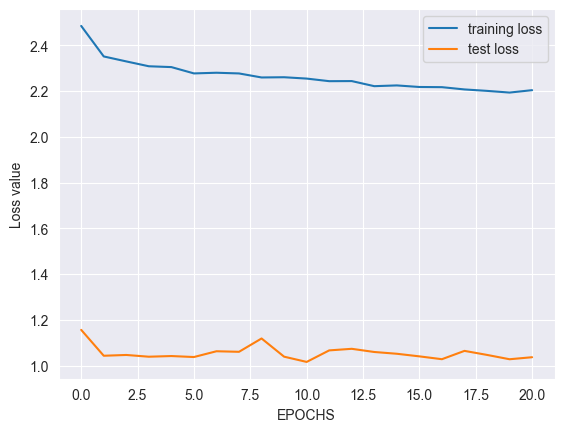

In [176]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

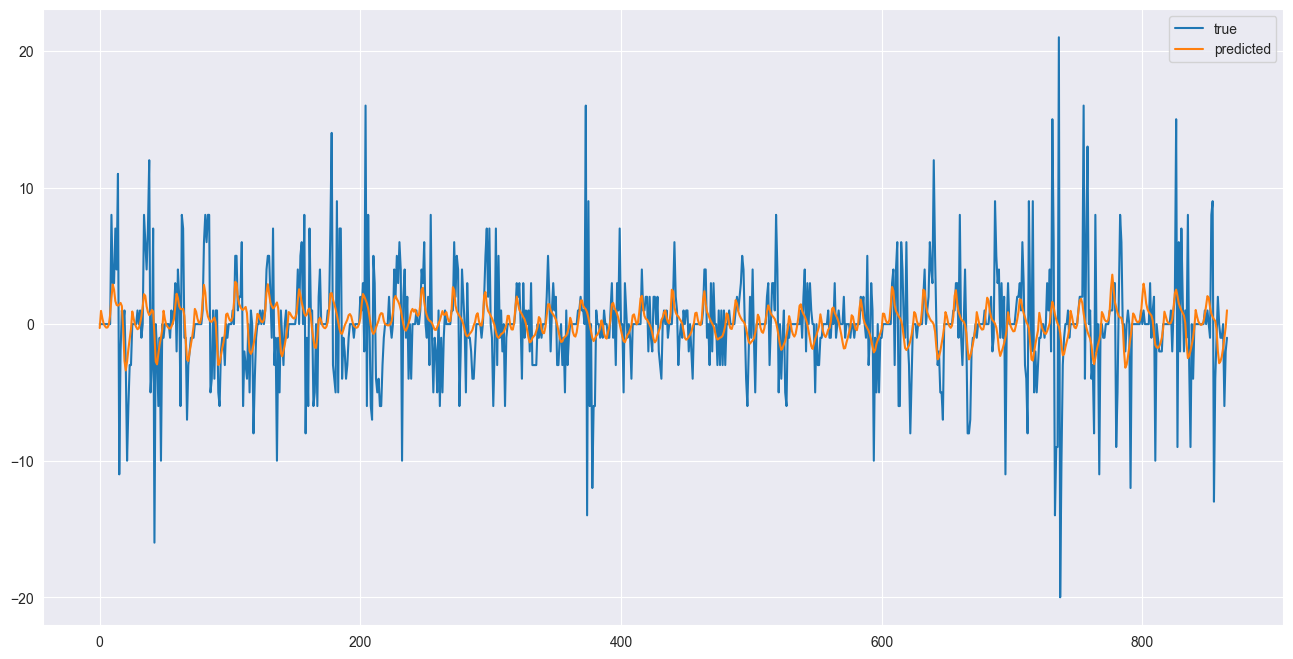

In [139]:
#Pcik some values to zoom in
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()